# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


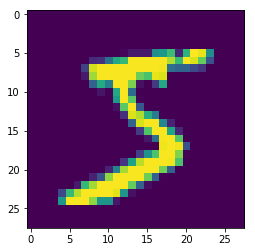

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Convolution2D, MaxPooling2D,GlobalAveragePooling2D

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# num_pixels = X_train.shape[1]*X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0],num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0],num_pixels).astype('float32')


# num_pixels = X_train.shape[1] * X_train.shape[2]
# X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
# X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

In [15]:
from keras.layers import Activation
model = Sequential()

#block 1 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #26

model.add(Convolution2D(20, 3, 3, activation='relu')) #24



model.add(Convolution2D(10, 1, 1, activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) #12
 
#block 2
model.add(Convolution2D(20, 3, 3, activation='relu')) #10

model.add(Convolution2D(20, 3, 3, activation='relu')) #8


model.add(Convolution2D(10,1,activation='relu')) #8

model.add(Convolution2D(10,8)) #8



#model.add(Flatten())
model.add(GlobalAveragePooling2D())


model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu")`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 20)        1820      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 10)        210       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 20)        1820      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 20)          3620      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 10)          210       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer="adam",
             metrics=['accuracy'])

In [0]:
from keras.callbacks import ModelCheckpoint

# checkpoint
filepath="weights-improvement_run_1_10-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

## Running a Vannila network

Block1

1x1

Maxpool

Block2

Shrink

GAP

A vannila network of less than 15k parameter  is used without  BN, DropOut, LR, larger batch size, change in Optimizer, etc.So train set is trained for 10 epochs with 64 batch size.




In [19]:


model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 138us/step - loss: 0.2567 - acc: 0.9244 - val_loss: 0.0813 - val_acc: 0.9762
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0798 - acc: 0.9759 - val_loss: 0.0737 - val_acc: 0.9784
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0606 - acc: 0.9819 - val_loss: 0.0508 - val_acc: 0.9845
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0503 - acc: 0.9847 - val_loss: 0.0413 - val_acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0439 - acc: 0.9865 - val_loss: 0.0443 - val_acc: 0.9859
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0366 - acc: 0.9889 - val_loss: 0.0419 - val_acc: 0.9865
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 

In [20]:


model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0212 - acc: 0.9930 - val_loss: 0.0351 - val_acc: 0.9890
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0189 - acc: 0.9938 - val_loss: 0.0326 - val_acc: 0.9895
Epoch 3/10
60000/60000 [==============================] - 5s 89us/step - loss: 0.0177 - acc: 0.9942 - val_loss: 0.0435 - val_acc: 0.9880
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0156 - acc: 0.9946 - val_loss: 0.0388 - val_acc: 0.9890
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0141 - acc: 0.9952 - val_loss: 0.0425 - val_acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0128 - acc: 0.9959 - val_loss: 0.0394 - val_acc: 0.9895
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.0125 - acc: 0.9955 - val_loss: 0.0428 - val_acc

## Inference

It is a overfitting model .Dropouts can be used and batch normalization could be done to make it perfect


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(score)

[0.04603520986512085, 0.9885]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.12323547e-15 8.92206708e-12 1.99736139e-09 1.12254872e-09
  9.61100121e-16 2.20931319e-13 3.14636415e-23 1.00000000e+00
  7.62407156e-16 2.15618878e-09]
 [5.69461867e-10 1.63914162e-08 1.00000000e+00 4.45647940e-13
  3.12764953e-11 1.11831550e-16 1.85571158e-09 5.66670420e-15
  1.25867941e-10 1.72633626e-15]
 [1.05429745e-08 9.99999404e-01 7.19224902e-09 8.35787967e-11
  4.72981469e-07 2.23276420e-09 7.87180099e-08 7.19100441e-08
  2.09558149e-08 2.63070876e-09]
 [9.99989748e-01 3.78307113e-13 3.02826493e-07 2.01208596e-08
  1.84512114e-10 5.03903550e-07 7.79916809e-06 3.26786176e-09
  4.86004623e-08 1.55390205e-06]
 [2.71056563e-11 7.87503840e-09 3.80763292e-13 1.50220629e-13
  9.99993443e-01 5.42912442e-14 3.50522639e-10 7.00055736e-13
  1.05976530e-11 6.58010231e-06]
 [3.98586852e-09 9.99997020e-01 6.24745633e-09 2.53223640e-11
  2.12306873e-06 1.22185054e-10 3.67916853e-09 8.97009670e-07
  2.96584659e-08 4.16264756e-09]
 [5.97537614e-18 1.14884846e-09 1.01744967e-11 2.72276877e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

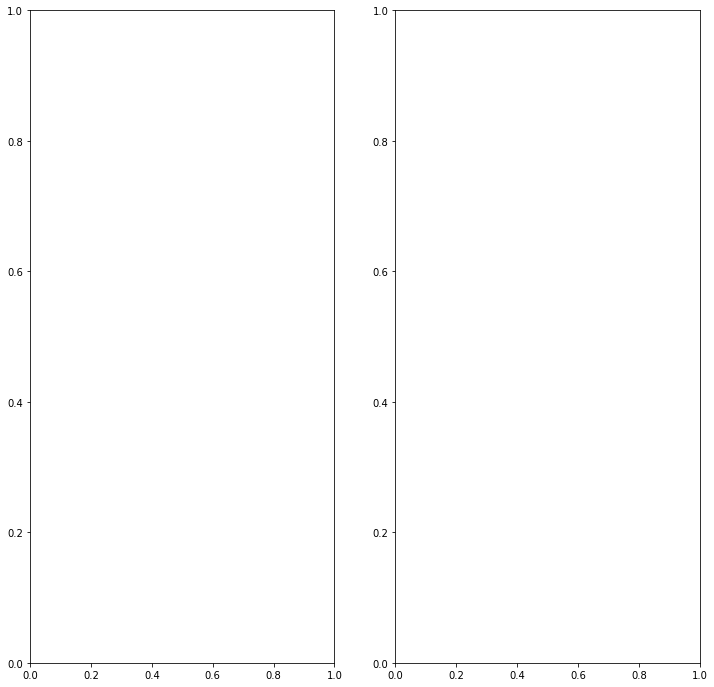

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_10'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()